In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("snsdata.csv")
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
df.describe(include = 'object')

,gender
count,27276
unique,2
top,F
freq,22054


In [7]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [8]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [11]:
df['gender'].value_counts(dropna = False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [12]:
df['gender'].fillna('not disclosed', inplace = True)

In [13]:
df['gender'].isnull().sum()

0

In [14]:
df.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [16]:
df['age'] = df.groupby('gradyear').transform(lambda x : x.fillna(x.mean())) 

In [17]:
df['age'].isnull().sum()

0

### Treating Outliers

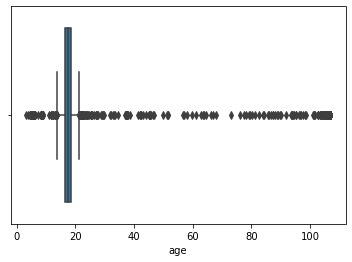

In [19]:
#Let's detect the outliers using a box plot below

sns.boxplot(df['age'])
plt.show()

In [20]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1

In [21]:
print(iqr)

1.887459224069687


In [22]:
df1 = df[(df['age'] > (q1 - 1.5*iqr)) & (df['age'] < (q3 + 1.5*iqr))]

In [23]:
df1['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

In [24]:
df1.shape

(29633, 40)

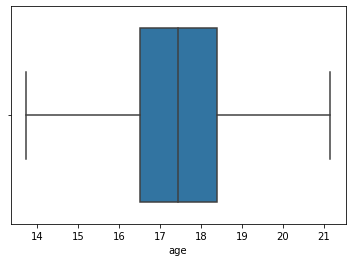

In [25]:
sns.boxplot(df1["age"])
plt.show()

### Data Processing

In [26]:
names = df1.columns[4:40]
scaled_feature = df.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [27]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [28]:
features = scaled_feature[names]

In [29]:
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [31]:
features = scaler.transform(features.values)
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [32]:
#Convert object variable to numeric
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3

In [33]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [34]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


### K Means Clustering

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
model = kmeans.fit(scaled_feature)

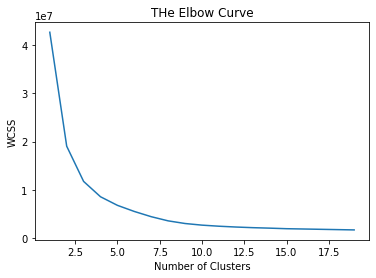

In [36]:
##Elbow Method
# Creating a function with KMeans to plot "The Elbow Curve"

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

In [38]:
#Fit K-Means clustering for k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [39]:
kmeans.labels_

array([2, 2, 4, ..., 2, 2, 2])

In [41]:
len(kmeans.labels_)

30000

In [42]:
df['cluster'] = kmeans.labels_
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


### Interpreting Clustering Results

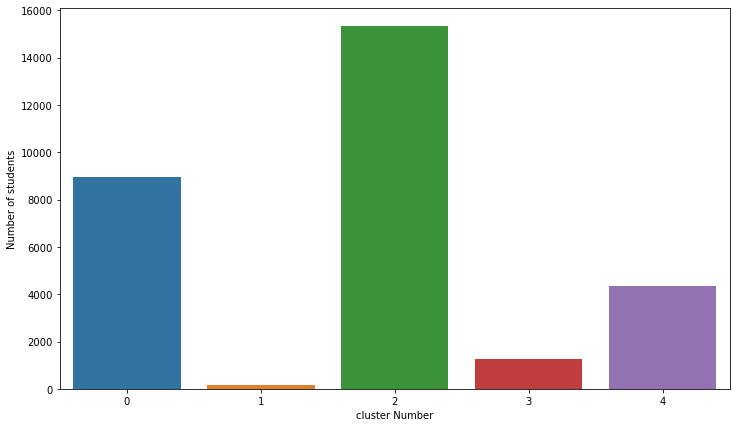

In [44]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

From the above plot we can see that cluster 1 is the largest and cluster 3 has fewest teen students.

In [45]:
#number of students belonging to each cluster
size_array = list(df.groupby(['cluster']).count()['age'].values)
size_array

[8955, 153, 15324, 1239, 4329]

In [46]:
#Lets's check the cluster statistics
df.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball',
                                  'swimming','cheerleading','baseball','tennis',
                                  'sports','cute','sex','sexy','hot','kissed',
                                  'dance','band','marching','music','rock','god',
                                  'church','jesus','bible','hair','dress','blonde','mall',
                                  'shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.291681,0.268118,0.245673,0.179341,0.171636,0.152540,0.110218,0.111446,0.094472,0.156449,...,0.121161,0.264545,0.378001,0.157342,0.072473,0.049916,0.194193,0.128867,0.088442,0.056840
1,0.320261,0.274510,0.274510,0.209150,0.215686,0.228758,0.156863,0.143791,0.098039,0.137255,...,0.124183,0.313725,0.581699,0.209150,0.124183,0.156863,0.228758,0.150327,0.137255,0.058824
2,0.225007,0.230227,0.193422,0.121248,0.110611,0.115962,0.086596,0.091752,0.081049,0.127056,...,0.080201,0.221026,0.298486,0.134952,0.055142,0.040068,0.178870,0.101018,0.083986,0.064017
3,0.384988,0.292171,0.243745,0.255044,0.202583,0.147700,0.203390,0.133979,0.096045,0.139629,...,0.133979,0.434221,0.487490,0.163842,0.134786,0.092010,0.206618,0.140436,0.118644,0.048426
4,0.331254,0.285516,0.271425,0.236544,0.179718,0.155001,0.140679,0.128436,0.091938,0.151767,...,0.108339,0.318549,0.447678,0.171633,0.096096,0.077616,0.173712,0.121968,0.090552,0.058674


#### The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.

